**LAB-09-DWM**

**Submitted To:**Ma'am Shehla Farooq

**Sumbitted By:**(PC)-M Humair Razaq

**Course:**BESE-28

**Section:**Alpha

**TASK-01**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display first 5 rows
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [ ]:
# Replace 0s with NaN for cleaning
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())



In [ ]:
# Features (X) and Labels (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [ ]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Define the model
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')


In [ ]:
# Fit the model and make predictions
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:
# Evaluate with confusion matrix, F1 score, and accuracy
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Euclidean-Confusion Matrix:\n", cm)
print("F1 Score:", f1)
print("Accuracy Score:", accuracy)


Euclidean-Confusion Matrix:
 [[81 18]
 [19 36]]
F1 Score: 0.6605504587155964
Accuracy Score: 0.7597402597402597


**TASK-09**

**Using Cosine Similarity**

In [ ]:
# Cosine similarity model
classifier_cosine = KNeighborsClassifier(n_neighbors=11, metric='cosine')
classifier_cosine.fit(X_train, y_train)
y_pred_cosine = classifier_cosine.predict(X_test)

# Evaluation
cm_cosine = confusion_matrix(y_test, y_pred_cosine)
f1_cosine = f1_score(y_test, y_pred_cosine)
accuracy_cosine = accuracy_score(y_test, y_pred_cosine)

print("Cosine Similarity - Confusion Matrix:\n", cm_cosine)
print("F1 Score:", f1_cosine)
print("Accuracy Score:", accuracy_cosine)


Cosine Similarity - Confusion Matrix:
 [[75 24]
 [13 42]]
F1 Score: 0.6942148760330579
Accuracy Score: 0.7597402597402597


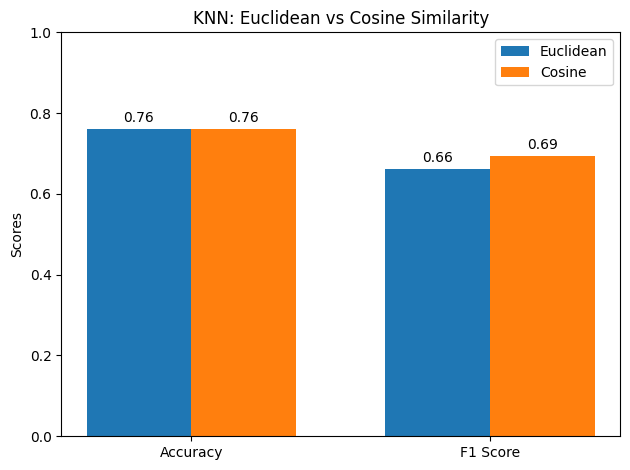

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and values
metrics = ['Accuracy', 'F1 Score']
euclidean_scores = [0.7597, 0.6606]
cosine_scores = [0.7597, 0.6942]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, euclidean_scores, width, label='Euclidean')
bars2 = ax.bar(x + width/2, cosine_scores, width, label='Cosine')

# Labels and formatting
ax.set_ylabel('Scores')
ax.set_title('KNN: Euclidean vs Cosine Similarity')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Add score labels on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


So as shown above **cosine similarity ** one is producing better values in terms of f1_score.